# Data Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moharamfatema/data-classification-ml-python/blob/main/classification.ipynb)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [5]:
url='https://drive.google.com/file/d/1Y2-FuthGBfCqKUhCyWTIt0w8danWx6vm/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
df.columns = ['fLength',
              'fWidth',
              'fSize',
              'fConc',
              'fConc1', 
              'fAsym',
              'fM3Long',
              'fM3Trans',
              'fAlpha',
              'fDist',
              'classified']
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classified
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [7]:
df['classified'].value_counts()

g    12331
h     6688
Name: classified, dtype: int64

In [8]:
df = df.groupby('classified')
df = df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True))
df['classified'].value_counts()

g    6688
h    6688
Name: classified, dtype: int64

In [9]:
test = df.sample(frac=0.3)
train = df.copy().drop(test.index)

print('train samples =', train.shape[0],
      '\ntest samples =', test.shape[0],
      '\ntotal =', train.shape[0] + test.shape[0])

new_idx = [t[1] for t in test.index]
test = test.set_index(pd.Series(new_idx))

train samples = 9363 
test samples = 4013 
total = 13376


In [10]:
Y = train['classified']
X = train.drop('classified', axis=1)

In [11]:
x_test = test.copy()
y_test = x_test.pop('classified')
y_test.value_counts()

g    2015
h    1998
Name: classified, dtype: int64

In [12]:
def cross_validation(estimator, X, y):
    scoring = ['precision_macro',
               'recall_macro',
               'f1_macro',
               'accuracy']
    
    # docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

    scores = cross_validate(estimator, X, y, scoring=scoring, n_jobs=-1, return_estimator=True,return_train_score=True,error_score='raise')
    # print (scores)
    plt.figure(figsize=(30, 20))
    plt.rcParams['font.size'] = '30'
    plt.plot(scores['test_precision_macro'], label='precision')
    plt.plot(scores['test_recall_macro'], label='recall')
    plt.plot(scores['test_f1_macro'], label='F1 score')
    plt.plot(scores['test_accuracy'], label='accuracy')
    plt.legend()
    plt.show()
    

    # for i, est in enumerate(scores['estimator']):
    #     predictions = est.predict(X)
    #     labels = est.classes_
    #     cm = confusion_matrix(y, predictions, labels=labels)
    #     disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                                   display_labels=labels)
    #     # disp.plot()
        

    return scores
    

In [13]:
ACCURACY = "test_accuracy"
PRECISION = "test_precision_macro"
RECALL = "test_recall_macro"
F1 = "test_f1_macro"

def avg(arr):
    return sum(arr)/len(arr)

def disp_avg_scores(scores):
    print("Average scores:\n")
    print(f"Accuracy = {avg(scores[ACCURACY])}")
    print(f"Precision = {avg(scores[PRECISION])}")
    print(f"Recall = {avg(scores[RECALL])}")
    print(f"F1 score = {avg(scores[F1])}")



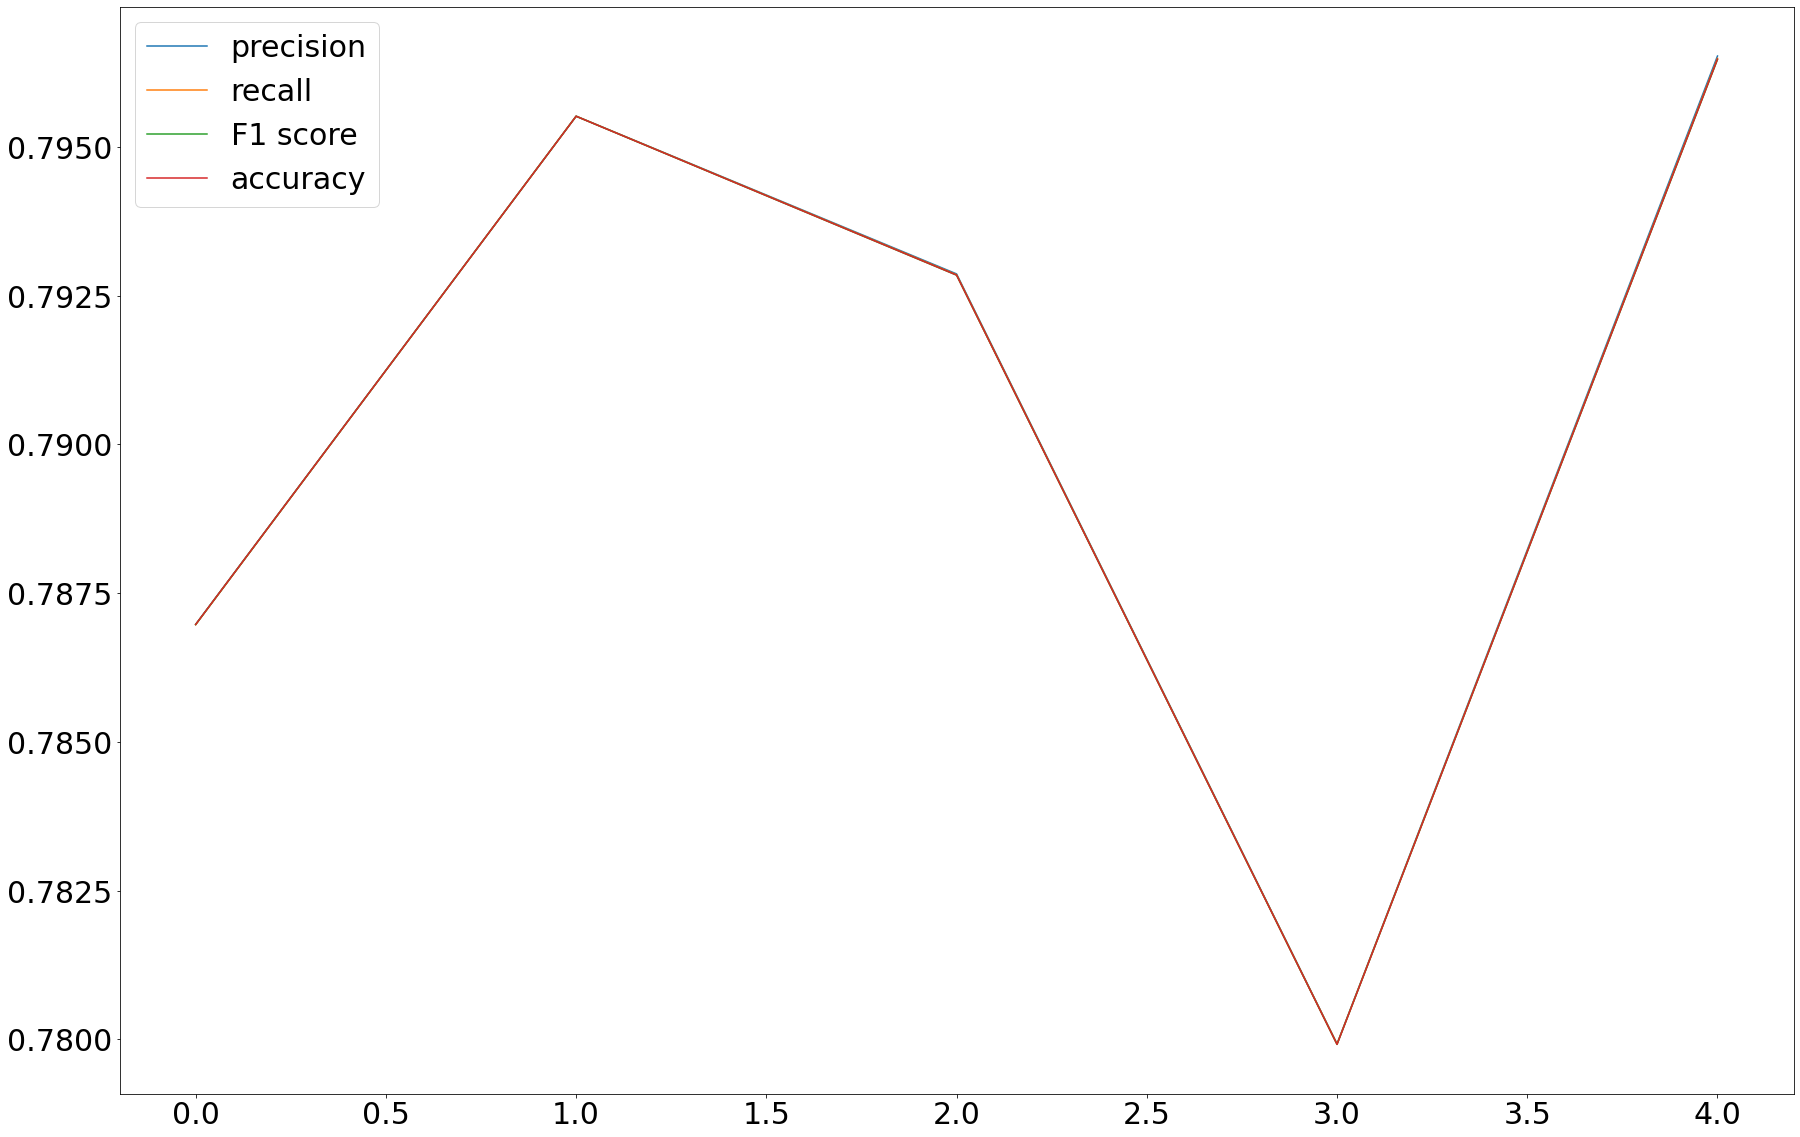

Average scores:

Accuracy = 0.7903445156314884
Precision = 0.7903620503457855
Recall = 0.7903495139975165
F1 score = 0.7903427920453341


In [14]:
decision_tree = DecisionTreeClassifier()
estimators =  cross_validation(decision_tree, X, Y)
disp_avg_scores(estimators)

In [15]:
DISPLAY_LABELS = ['g','h']
POS_LABEL = 'g'

def disp_scores(y_true,y_pred,pos_label = POS_LABEL,display_labels = DISPLAY_LABELS):
    ConfusionMatrixDisplay( confusion_matrix(y_true,y_pred),display_labels=display_labels).plot()
    print("Accuracy =",accuracy_score(y_true,y_pred))
    print("Precision =",precision_score(y_true,y_pred,pos_label=pos_label))
    print("Recall =",recall_score(y_true,y_pred,pos_label=pos_label))
    print("F1 =",f1_score(y_true,y_pred,pos_label=pos_label))


Scores on the test set :
Accuracy = 0.7976576127585348
Precision = 0.7991049229239184
Recall = 0.7975186104218362
F1 = 0.7983109786388474


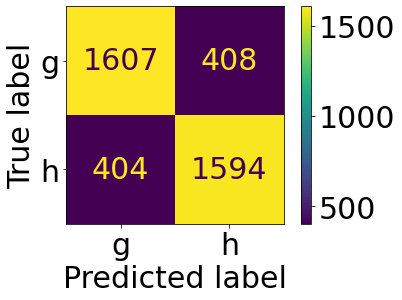

In [16]:
# scores of estimator on test set
decision_tree.fit(X,Y)
y_pred = decision_tree.predict(x_test)
print("Scores on the test set :")
disp_scores(y_test,y_pred)


## AdaBoost

### Parameters:
- n_estimators

1. define range of estimators: max: no of samples -- too many
2. for each n, cross validate and save the average metrics
3. choose the n with the heighrst average
4. test the best estimator against test dataframe.

In [20]:
# no of samples = 13376 samples

# choose an n, cross validate and store avg

def avg_scores_arr(scores):
    return {"accuracy":avg(scores[ACCURACY]),"precision": avg(scores[PRECISION]),"recall":avg(scores[RECALL]),"f1":avg(scores[F1])}

n = int(13376 / 4)

ada_boost = AdaBoostClassifier(n_estimators=n)

scores = cross_validation(ada_boost,X,Y)
avg_scores = avg_scores_arr(scores)
disp_avg_scores(scores)


KeyboardInterrupt: 

Accuracy = 0.8153501121355594
Precision = 0.8095238095238095
Recall = 0.8267990074441688
F1 = 0.8180702185121531


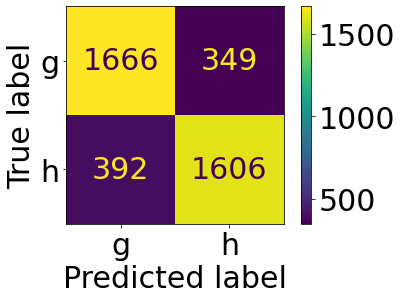

In [19]:
# execute only after tuning n_estimators
ada_boost.fit(X,Y)
y_pred_ada_boost = ada_boost.predict(x_test)
disp_scores(y_test,y_pred_ada_boost)